In [2]:
import pandas as pd, os
from utils.util import is_laptop
from datetime import date

In [3]:
folder_path = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/' if is_laptop() else 'E:/Skóli/HÍ/Vélaverkfræði Master HÍ/Lokaverkefni/data/'
hourly_path = folder_path + 'Measured/combined_klst/' + max(os.listdir(folder_path + 'Measured/combined_klst/'), key = lambda f: os.path.getmtime(folder_path + 'Measured/combined_klst/' + f))
merged_path = folder_path + 'Combined/' + max((f for f in os.listdir(os.path.join(folder_path, 'Combined')) if os.path.isfile(os.path.join(folder_path, 'Combined', f))), key=lambda f: os.path.getmtime(os.path.join(folder_path, 'Combined', f)))

In [4]:
hourly_df = pd.read_feather(hourly_path)
merged_df = pd.read_feather(merged_path)

In [5]:
# Rounds to next hour so as to be able to directly compare with the vedur klst file
def next_hour(time):
    return time.ceil('h')

In [6]:
hourly_df.stod = pd.to_numeric(hourly_df.stod, errors = 'coerce')
hourly_df.timi = pd.to_datetime(hourly_df.timi, errors = 'coerce')
hourly_df.fx = pd.to_numeric(hourly_df.fx, errors = 'coerce')
hourly_df.fg = pd.to_numeric(hourly_df.fg, errors = 'coerce')
hourly_df.f = pd.to_numeric(hourly_df.f, errors = 'coerce')
#hourly_df = hourly_df[(hourly_df.fx < 65) & (hourly_df.fg < 75)]
 
merged_df['timi'] = merged_df.time.apply(next_hour)

In [22]:
merged_df.shape

(69467, 30)

In [7]:
hourly_df.shape

(46476897, 6)

In [7]:
combined_df = pd.merge(merged_df, hourly_df, on = ['stod', 'timi'], how = 'inner', suffixes=('_merged', '_hourly'))
#combined_df = combined_df.dropna(subset=['fg_hourly'])

In [11]:
combined_df.shape

(68621, 34)

In [8]:
nails_df = combined_df[~(abs(combined_df.f_merged - combined_df.fx) <= 0.1)]

In [9]:
from matplotlib import pyplot as plt
import os, numpy as np, seaborn as sns, pandas as pd
from math import exp, log, log10

In [10]:
len(nails_df.stod.unique())

152

In [11]:
len(combined_df.stod.unique())

318

In [12]:
len(merged_df.stod.unique())

318

In [13]:
len(hourly_df.stod.unique())

351

In [18]:
import os

def extract_number(filename):
    """Extracts the number from the filename."""
    # Split the filename by non-digit characters and return the first group of digits found
    return ''.join(filter(str.isdigit, filename))

def find_matching_files(folder1, folder2):
    """Finds matching files in two folders based on extracted numbers."""
    files1 = os.listdir(folder1)
    files2 = os.listdir(folder2)
    
    # Extract numbers from filenames and store them in sets
    numbers1 = {extract_number(file) for file in files1}
    numbers2 = {extract_number(file) for file in files2}
    
    # Find common numbers (matching files)
    matching_numbers = numbers1.intersection(numbers2)
    
    # Filter files with matching numbers
    matching_files1 = [file for file in files1 if extract_number(file) in matching_numbers]
    matching_files2 = [file for file in files2 if extract_number(file) in matching_numbers]
    
    return matching_files1, matching_files2

# Example usage
folder1 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/10min'
folder2 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/klst'

matching_files1, matching_files2 = find_matching_files(folder1, folder2)

print("Matching files in folder 1:", matching_files1)
print("Matching files in folder 2:", matching_files2)
print("Number of matching files:", len(matching_files1))  # or len(matching_files2), they should be the same


Matching files in folder 1: []
Matching files in folder 2: []
Number of matching files: 0


In [19]:
import os

def extract_number(filename):
    """Extracts the number from the filename."""
    # Split the filename by '_' and return the last part
    return filename.split('_')[-1].split('.')[0]

def find_matching_files(folder1, folder2):
    """Finds matching files in two folders based on extracted numbers."""
    files1 = os.listdir(folder1)
    files2 = os.listdir(folder2)
    
    # Extract numbers from filenames and store them in sets
    numbers1 = {extract_number(file) for file in files1}
    numbers2 = {extract_number(file) for file in files2}
    
    # Find common numbers (matching files)
    matching_numbers = numbers1.intersection(numbers2)
    
    # Filter files with matching numbers
    matching_files1 = [file for file in files1 if extract_number(file) in matching_numbers]
    matching_files2 = [file for file in files2 if extract_number(file) in matching_numbers]
    
    return matching_files1, matching_files2

# Example usage
folder1 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/10min'
folder2 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/klst'

matching_files1, matching_files2 = find_matching_files(folder1, folder2)

print("Matching files in folder 1:", matching_files1)
print("Matching files in folder 2:", matching_files2)
print("Number of matching files:", len(matching_files1))  # or len(matching_files2), they should be the same


Matching files in folder 1: ['f_10min_1350.txt', 'f_10min_1361.txt', 'f_10min_1362.txt', 'f_10min_1368.txt', 'f_10min_1370.txt', 'f_10min_1391.txt', 'f_10min_1395.txt', 'f_10min_1453.txt', 'f_10min_1469.txt', 'f_10min_1470.txt', 'f_10min_1471.txt', 'f_10min_1472.txt', 'f_10min_1473.txt', 'f_10min_1474.txt', 'f_10min_1475.txt', 'f_10min_1477.txt', 'f_10min_1478.txt', 'f_10min_1479.txt', 'f_10min_1480.txt', 'f_10min_1481.txt', 'f_10min_1482.txt', 'f_10min_1483.txt', 'f_10min_1486.txt', 'f_10min_1487.txt', 'f_10min_1490.txt', 'f_10min_1493.txt', 'f_10min_1496.txt', 'f_10min_1570.txt', 'f_10min_1578.txt', 'f_10min_1590.txt', 'f_10min_1596.txt', 'f_10min_1672.txt', 'f_10min_1673.txt', 'f_10min_1679.txt', 'f_10min_1685.txt', 'f_10min_1689.txt', 'f_10min_1777.txt', 'f_10min_1779.txt', 'f_10min_1781.txt', 'f_10min_1868.txt', 'f_10min_1881.txt', 'f_10min_1919.txt', 'f_10min_1924.txt', 'f_10min_1925.txt', 'f_10min_1936.txt', 'f_10min_1938.txt', 'f_10min_2050.txt', 'f_10min_2175.txt', 'f_10min_21

In [20]:
import os

def extract_number(filename):
    """Extracts the number from the filename."""
    # Split the filename by '_' and return the last part
    return filename.split('_')[-1].split('.')[0]

def find_matching_files(folder1, folder2):
    """Finds matching files in two folders based on extracted numbers."""
    files1 = os.listdir(folder1)
    files2 = os.listdir(folder2)
    
    # Extract numbers from filenames and store them in sets
    numbers1 = {extract_number(file) for file in files1}
    numbers2 = {extract_number(file) for file in files2}
    
    # Find common numbers (matching files)
    matching_numbers = numbers1.intersection(numbers2)
    
    # Filter files with matching numbers
    matching_files1 = [file for file in files1 if extract_number(file) in matching_numbers]
    matching_files2 = [file for file in files2 if extract_number(file) in matching_numbers]
    
    return matching_files1, matching_files2

# Example usage
folder1 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/10min'
folder2 = 'D:/Skoli/Mastersverkefni/lokaverkefni_vel/data/Measured/vg'

matching_files1, matching_files2 = find_matching_files(folder1, folder2)

print("Matching files in folder 1:", matching_files1)
print("Matching files in folder 2:", matching_files2)
print("Number of matching files:", len(matching_files1))  # or len(matching_files2), they should be the same


Matching files in folder 1: ['f_10min_31109.txt', 'f_10min_31122.txt', 'f_10min_31363.txt', 'f_10min_31364.txt', 'f_10min_31365.txt', 'f_10min_31380.txt', 'f_10min_31387.txt', 'f_10min_31392.txt', 'f_10min_31399.txt', 'f_10min_31474.txt', 'f_10min_31475.txt', 'f_10min_31484.txt', 'f_10min_31488.txt', 'f_10min_31561.txt', 'f_10min_31562.txt', 'f_10min_31572.txt', 'f_10min_31577.txt', 'f_10min_31578.txt', 'f_10min_31579.txt', 'f_10min_31591.txt', 'f_10min_31599.txt', 'f_10min_31640.txt', 'f_10min_31674.txt', 'f_10min_31840.txt', 'f_10min_31882.txt', 'f_10min_31931.txt', 'f_10min_31932.txt', 'f_10min_31942.txt', 'f_10min_31943.txt', 'f_10min_31948.txt', 'f_10min_31950.txt', 'f_10min_31958.txt', 'f_10min_31985.txt', 'f_10min_31986.txt', 'f_10min_32097.txt', 'f_10min_32179.txt', 'f_10min_32190.txt', 'f_10min_32224.txt', 'f_10min_32250.txt', 'f_10min_32282.txt', 'f_10min_32322.txt', 'f_10min_32355.txt', 'f_10min_32365.txt', 'f_10min_32372.txt', 'f_10min_32377.txt', 'f_10min_32390.txt', 'f_10

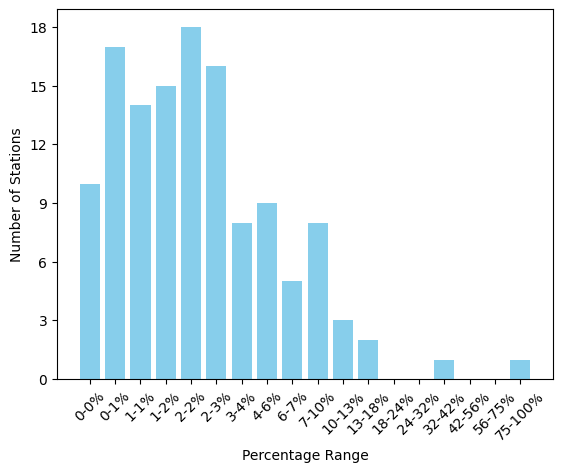

In [109]:
# Combine value counts from both DataFrames to ensure all values are present
combined_value_counts = pd.concat([nails_df.stod.value_counts(), combined_df.stod.value_counts()], axis=1, keys=['nails', 'combined']).fillna(0)

# Calculate the quotient of percentages
quotient = (combined_value_counts['nails'] / combined_value_counts['combined']).fillna(0)

# Automatically set ranges based on the quotient values
min_val = quotient.min()
max_val = quotient.max()
n = 25
range_width = (max_val - min_val) / n  # Divide into n ranges
ranges = np.logspace(-3, np.log10(max_val), num=n)
ranges = [(0, ranges[0])] + [(ranges[i], ranges[i+1]) for i in range(len(ranges)-1)]

# Calculate the quotient of percentages falling into each range
quotient_ranges = {}
for lower, upper in ranges:
    quotient_range = (combined_value_counts['nails'] / combined_value_counts['combined']).between(lower, upper).sum()
    quotient_ranges[f'{lower*100:.0f}-{upper*100:.0f}%'] = quotient_range

# Plot the graph
plt.bar(quotient_ranges.keys(), quotient_ranges.values(), color='skyblue')
plt.xlabel('Percentage Range')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.yticks(range(0, 19, 3))

plt.savefig('../visualization/outputs/png/error_count.png')

plt.show()

In [25]:
nailStripped_df = combined_df[abs(combined_df.f_merged - combined_df.fx) <= 0.1]
assert nailStripped_df.f_merged.max() < 65

In [29]:
df_toWrite = nailStripped_df[['X', 'Y', 'time', 'ws_15', 'ws_250', 'ws_500', 'wd_15',
       'wd_250', 'wd_500', 'p_15', 'p_250', 'p_500', 't_15', 't_250', 't_500',
       'stod', 'f_merged', 'fg_merged', 'd_merged', 'Ri_01', 'Ri_12', 'Ri_02', 'N_01', 'N_12', 'N_02']]

df_toWrite.columns

Index(['X', 'Y', 'time', 'ws_15', 'ws_250', 'ws_500', 'wd_15', 'wd_250',
       'wd_500', 'p_15', 'p_250', 'p_500', 't_15', 't_250', 't_500', 'stod',
       'f_merged', 'fg_merged', 'd_merged', 'Ri_01', 'Ri_12', 'Ri_02', 'N_01',
       'N_12', 'N_02'],
      dtype='object')

In [30]:
df_toWrite = df_toWrite.rename({'f_merged':'f', 'fg_merged':'fg', 'd_merged':'d'}, axis = 1)

df_toWrite.columns

Index(['X', 'Y', 'time', 'ws_15', 'ws_250', 'ws_500', 'wd_15', 'wd_250',
       'wd_500', 'p_15', 'p_250', 'p_500', 't_15', 't_250', 't_500', 'stod',
       'f', 'fg', 'd', 'Ri_01', 'Ri_12', 'Ri_02', 'N_01', 'N_12', 'N_02'],
      dtype='object')

In [31]:
outputpath = folder_path + f'NailStripped/merged_stripped_{date.today()}.feather'
df_toWrite.to_feather(outputpath)